## 1. 필요 모듈 import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

## 2. 데이터 불러오기

In [23]:
_path_2019 = os.path.join('../data', '2019년 서울 아파트 실거래가.csv')
_path_2021 = os.path.join('../data', '2021년 서울 아파트 실거래가.csv')
apart_2021_yesna = os.path.join('../data', '2021년 서울 아파트 실거래가.csv')

## 2-1. 데이터 전처리

In [24]:
apart_2019 = pd.read_csv(_path_2019, encoding="cp949").dropna(how='any')
apart_2021 = pd.read_csv(_path_2021, encoding="cp949").dropna(how='any')
apart_2021_yesna = pd.read_csv(apart_2021_yesna, encoding="cp949")
temp_contract_date = apart_2021['계약년월']
apart_2019['거래금액'] = apart_2019['거래금액'].apply(lambda x : ''.join(x.split(',')))햣
apart_2021['거래금액(만원)'] = apart_2021['거래금액(만원)'].apply(lambda x : ''.join(x.split(',')))
apart_2019['거래금액'] = apart_2019['거래금액'].astype('int64')
apart_2021['거래금액(만원)']= apart_2021['거래금액(만원)'].astype('int64')
apart_2019['계약년월'] = (apart_2019['거래년도'].astype('str')+'-'+apart_2019['거래월'].astype('str')+'-' + apart_2019['거래일자'].astype('str')).astype('datetime64')
apart_2021['계약년월'] = apart_2021['계약년월'].astype('str').apply(lambda x: str(x[:4]) + '-'+str(x[4:])).astype('datetime64')
apart_2019['법정동'] = apart_2019['법정동'].apply(lambda x: ''.join(x.split()))
apart_2021['동']  = apart_2021.loc[apart_2021['해제사유발생일'].notnull(), '시군구'].apply(lambda x : x.split()[-1])
apart_2021_yesna['구']  = apart_2021_yesna['시군구'].apply(lambda x : x.split()[-2])

In [4]:
#영우의 PR
#2번째 PR
#3번째 PR
#4번째 PR

In [ ]:
plt.figure(figsize=(10,12))
n = 2

h_2019_con = apart_2021.groupby('동')[['해제사유발생일']].agg('count').sort_values(by='해제사유발생일',ascending=False).head()
h_2021_con = apart_2021.groupby('동')[['해제사유발생일', '거래금액(만원)']].agg({'해제사유발생일':'count', '거래금액(만원)':'mean'}).sort_values(by='해제사유발생일',ascending=False).head()

h_2019_con = apart_2021.groupby('동')[['해제사유발생일']].agg('count').sort_values(by='해제사유발생일',ascending=False).head()
temp = h_2019_con.reset_index()['동']
k = apart_2019.groupby('법정동')[['거래금액']].mean().reset_index()
k2 = pd.merge(k, temp,left_on='법정동', right_on='동', how='right')

plt.subplot(n,1,1)
sns.barplot(x = k2['동'], y =k2['거래금액']).set_title('2019년 해제사유에 따른 평균거래금액', fontsize=15)
plt.yticks(np.arange(10000, 180000, 20000))
plt.subplot(n,1,2)
sns.barplot(x = h_2021_con.index, y = h_2021_con['거래금액(만원)']).set_title('2021년 해제사유에 따른 평균거래금액', fontsize=15)
plt.yticks(np.arange(10000, 180000, 20000))
plt.show()

## 2-2 상계 구로 신정 봉천 서초 중에서 해제사유가 발생한 아파트 만의 거래 금액 변화

In [ ]:
# 동이 상계 구로 신정 봉천 서초면 True
def find_add(a):
    add = ['상계동', '구로동', '신정동', '봉천동', '서초동']
    if a in add:
        return True
    return False

# 21년 : 상계 구로 신정 봉천 서초 중 해제사유가 발생한 아파트 조건
condition_21 = apart_2021['동'].apply(find_add) & apart_2021['해제사유발생일'].notnull()
data_21 = apart_2021[condition_21][['동', '단지명', '거래금액(만원)']]

# 19년 : 상계 구로 신정 봉천 서초 중 21년 해제사유가 발생한 아파트
condition_19 = apart_2019['법정동'].apply(find_add) & (apart_2019['아파트이름'].isin(data_21['단지명']))
data_19 = apart_2019[condition_19][['법정동', '아파트이름','거래금액']]
change = data_21.groupby('동')['거래금액(만원)'].mean() - data_19.groupby('법정동')['거래금액'].mean()
# change = data_21.groupby('단지명')['거래금액(만원)'].mean() - data_19.groupby('아파트이름')['거래금액'].mean()
change.dropna(inplace=True)

change

In [ ]:
plt.yticks(np.arange(-20000, 30000, 5000))
plt.xlabel('동')
plt.ylabel('평균 거래금액 차이(만원)')
plt.title('동 별 해제사유가 발생한 아파트의 거래 금액 변화(2021 - 2019)')
sns.barplot(x=change.index, y=change.values)
plt.show()

## 3. 데이터 개요 확인

In [ ]:
display(apart_2019.describe(), apart_2019.info())
display("-------------------------------------------------------------")
display(apart_2021.describe(), apart_2021.info())
display(apart_2019.corr(), apart_2021.corr())
display(apart_2019.head(), apart_2021.head())

## 4-1 2019년과 2021년도의 동별 거래금액의 평균, 최소, 최댓값

In [ ]:
from cProfile import label


def split_address(x):
    dong = x.split()[-1]
    return dong
ap1_dong = apart_2021.loc[:, '시군구'].apply(split_address)


apart_2019_new = pd.DataFrame()
apart_2019_new['아파트이름'] = apart_2019['아파트이름'] 
apart_2019_new['동'] = apart_2019['법정동'].str.strip()
apart_2019_new['거래금액']=apart_2019['거래금액'] 
apart_2019_new['계약년월']=apart_2019['계약년월'] 


apart_2021_new = pd.DataFrame()
apart_2021_new['아파트이름'] = apart_2021['단지명']
apart_2021_new['동'] = ap1_dong
apart_2021_new['거래금액'] = apart_2021['거래금액(만원)']
apart_2021_new['계약년월'] = apart_2021['계약년월']


df19 = apart_2019_new.groupby('동')['거래금액'].agg(['mean', 'min', 'max']).reset_index()
df21 = apart_2021_new.groupby('동')['거래금액'].agg(['mean', 'min', 'max']).reset_index()
df = pd.merge(df19, df21,on='동',how='inner')
df['mean_dif'] = df['mean_y']-df['mean_x']
df['min_dif'] = df['min_y']-df['min_x']
df['max_dif'] = df['max_y']-df['max_x']
pd.set_option('display.max_rows', None)
df

## 4-1 데이터 시각화 - 상관관계 분석 히트맵

In [10]:
Q3_2019 = apart_2019['거래금액'].quantile(0.75)
Q1_2019 = apart_2019['거래금액'].quantile(0.25)
IQR2019 = Q3_2019 - Q1_2019
lower_fence2019 = Q1_2019 - (IQR2019 * 1.5)   # 보다 작거나
upper_fence2019 = Q3_2019 + (IQR2019 * 1.5)   # 보다 큰 것
print(IQR2019, lower_fence2019, upper_fence2019)

Q3_2021 = apart_2021['거래금액(만원)'].quantile(0.75)
Q1_2021 = apart_2021['거래금액(만원)'].quantile(0.25)
IQR2021 = Q3_2021 - Q1_2021
lower_fence2021 = Q1_2021 - (IQR2021 * 1.5)   # 보다 작거나
upper_fence2021 = Q3_2021 + (IQR2021 * 1.5)   # 보다 큰 것
print(IQR2021, lower_fence2021, upper_fence2021)

54200.0 -36500.0 180300.0
80775.0 -56937.5 266162.5


In [ ]:
#outlier없는 히트맵
apart_2021['계약년월'] = temp_contract_date
con2019 = apart_2019['거래금액'] <= upper_fence2019
nooutlier_2019 = apart_2019.loc[con2019]

con2021 = apart_2021['거래금액(만원)'] <= upper_fence2021
nooutlier_2021 = apart_2021.loc[con2019]

plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
sns.heatmap(nooutlier_2019.corr(), annot=True).set_title('2019년 서울 아파트 실거래가 히트맵', fontsize=20)
plt.subplot(2,1,2)
sns.heatmap(nooutlier_2021.corr(), annot=True).set_title('2021년 서울 아파트 실거래가 히트맵', fontsize=20)
plt.show()

## 4-2. 데이터 시각화 - 거래금액에 따른 박스 플롯

In [ ]:
plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
# display(sns.boxplot(x= '거래금액', y='전용면적', data=apart_2019))
sns.boxplot(y= '거래금액', data=apart_2019).set_title('2019년 서울 아파트 실거래가 박스플롯', fontsize=20)
plt.subplot(2,1,2)
# display(sns.boxplot(x= '거래금액(만원)', y='전용면적(㎡)', data=apart_2021))
sns.boxplot(y= '거래금액(만원)', data=apart_2021).set_title('2021년 서울 아파트 실거래가 박스플롯', fontsize=20)
plt.show()

In [ ]:
#outlier있는 히트맵
plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
sns.heatmap(apart_2019.corr(), annot=True).set_title('2019년 서울 아파트 실거래가 히트맵', fontsize=20)
plt.subplot(2,1,2)
sns.heatmap(apart_2021.corr(), annot=True).set_title('2021년 서울 아파트 실거래가 히트맵', fontsize=20)
plt.show()
apart_2021['계약년월'] = apart_2021['계약년월'].astype('str').apply(lambda x: str(x[:4]) + '-'+str(x[4:])).astype('datetime64')

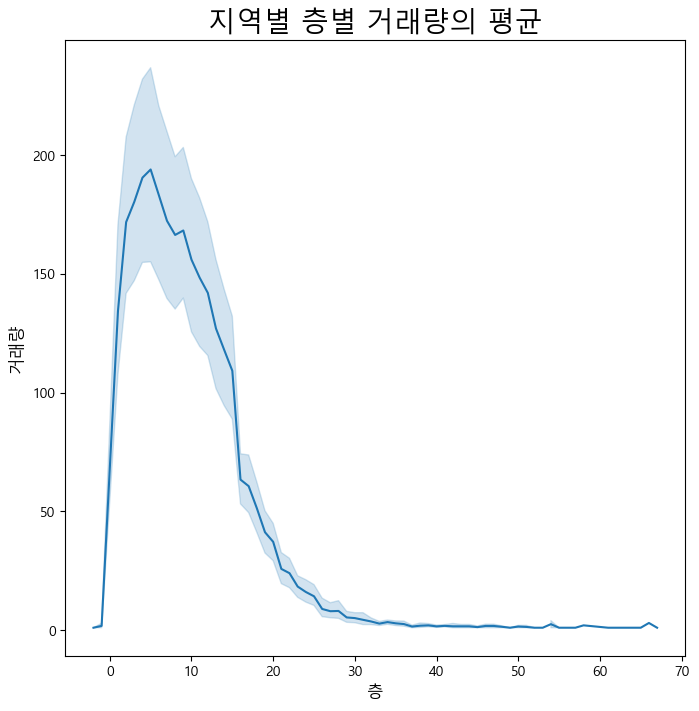

In [28]:
#지역별 층별 거래량의 평균_2019
plt.figure(figsize=(8,8))
floor_count = pd.DataFrame(apart_2019.groupby(['지역코드'])['층'].value_counts()).rename(columns={'층': '거래량'})
sns.lineplot(data=floor_count, x='층', y='거래량')
plt.title('지역별 층별 거래량의 평균(2019)', fontsize=20)
plt.xlabel('층', fontsize=12)
plt.ylabel('거래량', fontsize=12)
plt.show()

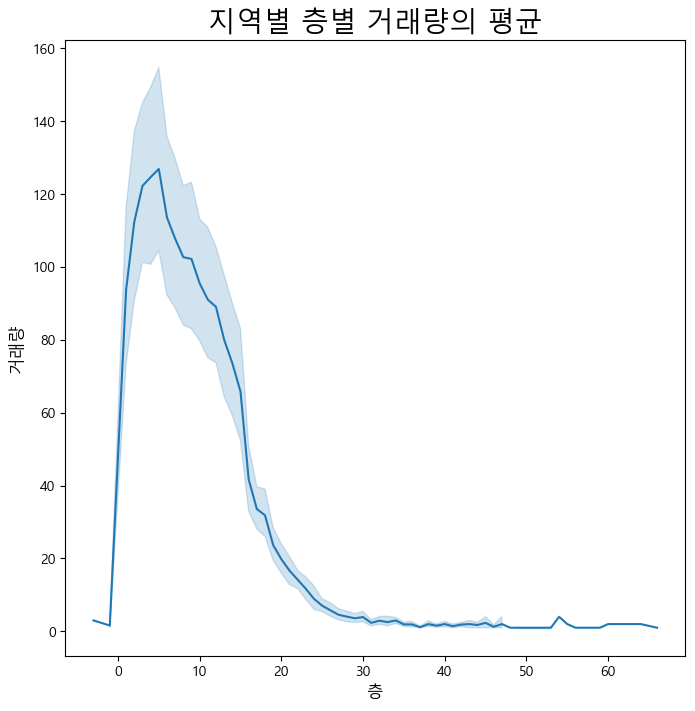

In [26]:
#지역별 층별 거래량의 평균_2021
plt.figure(figsize=(8,8))
floor_count_2021 = pd.DataFrame(apart_2021_yesna.groupby(['구'])['층'].value_counts()).rename(columns={'층': '거래량'})
sns.lineplot(data=floor_count_2021, x='층', y='거래량')
plt.title('지역별 층별 거래량의 평균(2021)', fontsize=20)
plt.xlabel('층', fontsize=12)
plt.ylabel('거래량', fontsize=12)
plt.show()

,층,거래량
0,-2~4,21788
1,5~11,33257
2,12~18,17814
3,19~25,4488
4,26~32,846
5,33~39,218
6,40~46,70
7,47~53,32
8,54~60,13
9,61~67,8


<AxesSubplot:xlabel='층', ylabel='거래량'>

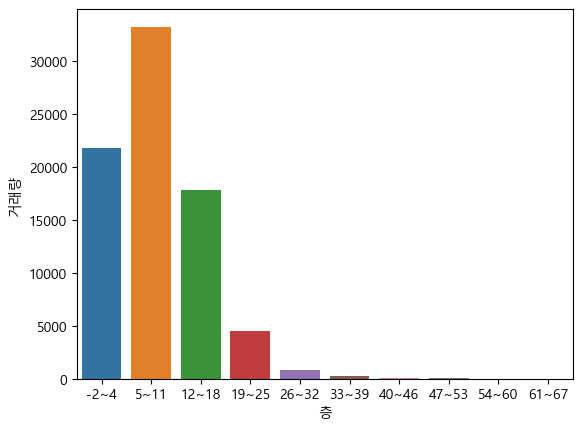

In [27]:
#지역별 7개층당 거래량
floor_list = []
for i in list(set(apart_2019['지역코드'])):
    floor_count_hist = pd.DataFrame(np.array(floor_count.reset_index()).reshape(910,3)).rename(columns={0: '지역코드', 1: '층', 2: '거래량'})
    con = floor_count_hist['지역코드'] == i
    floor_count_hist.loc[con]
    temp_floor = pd.DataFrame(np.array(floor_count.reset_index()).reshape(910,3)).rename(columns={0: '지역코드', 1: '층', 2: '거래량'})
    con = temp_floor['지역코드'] == i
    temp_floor = temp_floor.loc[con]
    for i in range(10):
        
        con2 = (temp_floor['층'] >= i*7-2) & (temp_floor['층'] < i*7+6)
        i = temp_floor.loc[con2]
        
        floor_list.append(i['거래량'].sum())
temp = pd.DataFrame(pd.DataFrame(np.array(floor_list).reshape(25,10)).sum()).rename(columns={0: '거래량'})
for i in range(10):
    temp = temp.rename(index={i: f'{i*7-2}~{i*7+4}'})
temp = temp.reset_index().rename(columns={'index': '층'})
display(temp)
sns.barplot(data=temp, x='층', y='거래량')

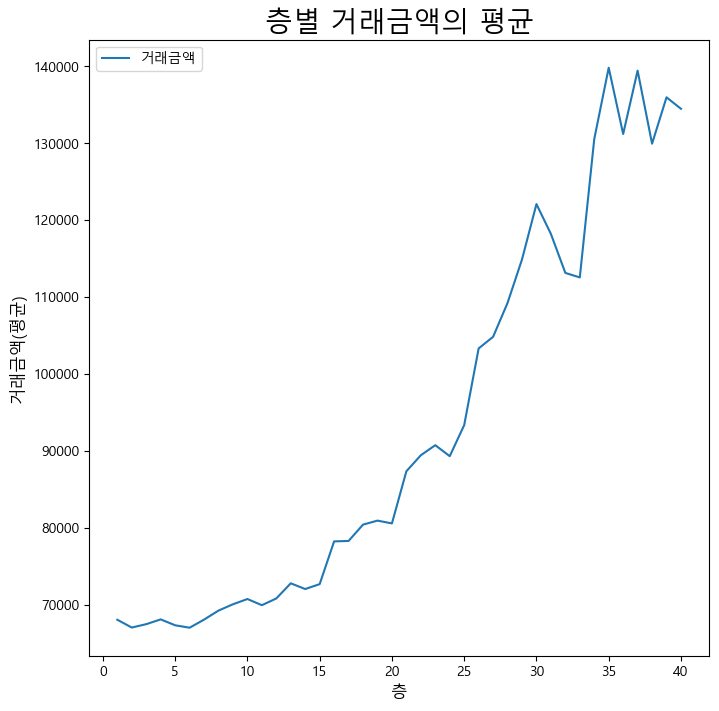

In [16]:
#1층부터 30층까지 층별 거래금액의 평균
plt.figure(figsize=(8,8))
con_floor = (nooutlier_2019['층'] <= 40) & (1 <= nooutlier_2019['층'])
floor_1_to_30 = nooutlier_2019.loc[con_floor]
floor_1_to_30_mean = pd.DataFrame(floor_1_to_30.groupby(['층'])['거래금액'].mean())
sns.lineplot(data=floor_1_to_30_mean)
plt.title('층별 거래금액의 평균', fontsize=20)
plt.xlabel('층', fontsize=12)
plt.ylabel('거래금액(평균)', fontsize=12)
plt.show()
